In [14]:
import scipy as sp
import scipy.stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# 다항분포에서 시행 회수 1로 설정한다.
mu = [0.1, 0.1, 0.1, 0.1, 0.3, 0.3]
rv = sp.stats.multinomial(1, mu)

C:\Users\user\.conda\envs\test_envs\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52852 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\.conda\envs\test_envs\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53580 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\.conda\envs\test_envs\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\.conda\envs\test_envs\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\.conda\envs\test_envs\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\.conda\envs\test_envs\lib\site-packages\matplotlib\backe

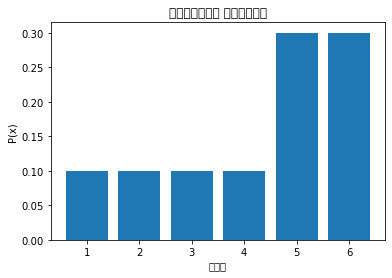

In [9]:
xx = np.arange(1, 7)
xx_ohe = pd.get_dummies(xx)

plt.bar(xx, rv.pmf(xx_ohe.values))
plt.ylabel("P(x)")
plt.xlabel("표본값")
plt.title("카테고리분포의 확률질량함수")
plt.show()

In [10]:
np.random.seed(1)
X = rv.rvs(100)
X[:5]

array([[0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0]])

C:\Users\user\.conda\envs\test_envs\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\.conda\envs\test_envs\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48044 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\.conda\envs\test_envs\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47112 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\.conda\envs\test_envs\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\.conda\envs\test_envs\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49496 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\.conda\envs\test_envs\lib\site-packages\matplotlib\backe

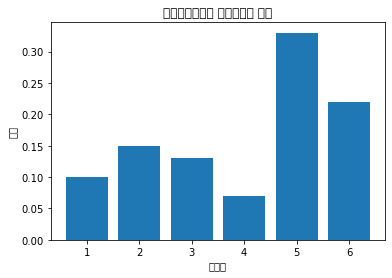

In [11]:
y = X.sum(axis=0) / float(len(X))
plt.bar(np.arange(1, 7), y)
plt.title("카테고리분포의 시뮬레이션 결과")
plt.xlabel("표본값")
plt.ylabel("비율")
plt.show()

In [12]:
df = pd.DataFrame({"이론": rv.pmf(xx_ohe.values), "시뮬레이션": y},
                  index=np.arange(1, 7)).stack()
df = df.reset_index()
df.columns = ["표본값", "유형", "비율"]
df.pivot("표본값", "유형", "비율")
df

,표본값,유형,비율
0,1,이론,0.10
1,1,시뮬레이션,0.10
2,2,이론,0.10
3,2,시뮬레이션,0.15
4,3,이론,0.10
5,3,시뮬레이션,0.13
6,4,이론,0.10
7,4,시뮬레이션,0.07
8,5,이론,0.30
9,5,시뮬레이션,0.33


C:\Users\user\.conda\envs\test_envs\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52852 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\.conda\envs\test_envs\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53580 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\.conda\envs\test_envs\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\.conda\envs\test_envs\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\.conda\envs\test_envs\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\.conda\envs\test_envs\lib\site-packages\matplotlib\backe

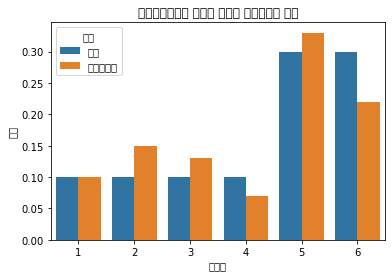

In [15]:
sns.barplot(x="표본값", y="비율", hue="유형", data=df)
plt.title("카테고리분포의 이론적 분포와 시뮬레이션 분포")
plt.show()